                idx              a             b             c              d  \
count  35843.000000   35843.000000  35843.000000  35843.000000   35843.000000   
mean   17921.000000     309.365845      4.206568     79.663365     432.235583   
std    10347.127186    3301.157429     20.057586     19.426100    4184.996228   
min        0.000000       0.000000      0.000000     77.000000       0.000000   
25%     8960.500000       5.000000      0.000000     77.000000       0.000000   
50%    17921.000000      26.000000      0.000000     77.000000       0.000000   
75%    26881.500000     109.000000      3.000000     77.000000     220.000000   
max    35842.000000  462806.000000    841.000000    746.000000  209671.000000   

                  e             f             g             h             Y  
count  35843.000000  35843.000000  35843.000000  35843.000000  35843.000000  
mean       2.452390      0.976090      1.074771      0.374997      0.546522  
std       18.846008      6.049105   

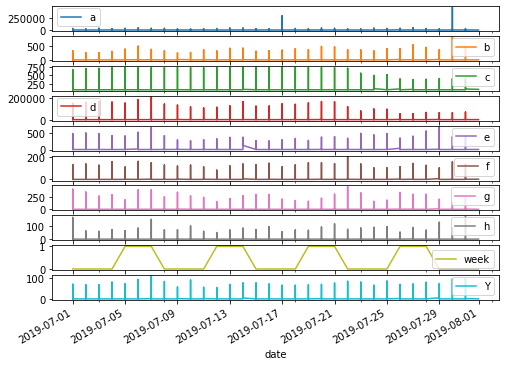

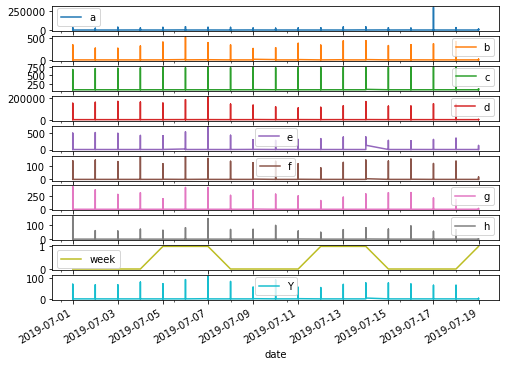

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import datetime as dt

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

BASE_DIR = os.path.dirname(os.path.abspath(__file__))
DATA_DIR = os.path.join(BASE_DIR, 'data')
LOG_DIR = os.path.join(BASE_DIR, 'log')

TEST_SIZE = 20000
# TEST_SIZE : 몇일 간 데이터로 테스트할 것 이냐

WINDOW_SIZE = 5
# WINDOW_SIZE : 얼마만큼의 데이터로 예측할 것이냐

EPOCHS_NUM = 200
# TRAINING 반복 수

"""
분석할 데이터를 전처리
    Parameters
        @dataset ( Type : DataFrame or TextParser) : 읽어오는 전체 데이터 셋
        @keyword ( Type : String ) : dataset에서 검색할 keyword
        @startIndex ( Type : Integer ) : 학습을 시작한 시작일, N - 1 = N 일
        @pastSize : ( Type : Integer ) : 학습할 데이터 양
        @targetSize : ( Type : Integer ) : 예측할 데이터 양

    Return
        @xAxis ( Type : 2nd Array ) :
        @yAxis ( Type : 2nd Array ) :
"""
def showplot_dataset(dataframe):
    plot_cols = ['a', 'b', 'c','d','e','f','g','h','week','Y']
    plot_features = dataframe[plot_cols]
    plot_features.index = dataframe['date']
    _ = plot_features.plot(subplots=True)

    plot_features = dataframe[plot_cols][:20000]
    plot_features.index = dataframe['date'][:20000]
    _ = plot_features.plot(subplots=True)

def preprocessing_dataframe(dataset):
    del dataset['idx']
    del dataset['hash']
    # 불필요한 idx,keyword 컬럼 삭제

    dataset['week'] = dataset['date'].dt.weekday.map(lambda day: 1 if day >= 4 else 0)
    # 0: 월요일 1: 화요일 ... 6: 일요일로 변환 후, 주말(금, 토, 일) 은 1의 값으로 나머지 평일은 1로 지정한다.
    
    return dataset

# def makeDataset(data, label, windowSize = 20, keyword=None):
#     feature_list = []
#     label_list = []
#     if keyword is None:
#         print('NONE KEYWORD')
#     else:
#         print(keyword)

#     for idx in range(len(data) - windowSize ):
#         feature_list.append(np.array(data.iloc[idx: idx + windowSize]))
#         label_list.append(np.array(label.iloc[idx + windowSize]))

#     return np.array(feature_list), np.array(label_list)

# def makeModel(feature):
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.LSTM(16, 
#                input_shape=(feature.shape[1], feature.shape[2]), 
#                activation='relu', 
#                return_sequences=False)
#           )
#     model.add(tf.keras.layers.Dense(1))

#     return model


# def learn(model, xTrain, yTrain, xValid, yValid):
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

#     model_path = 'model'
#     filename = os.path.join(model_path, 'tmp_checkpoint.h5')
#     checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

#     history = model.fit(xTrain, yTrain, epochs = EPOCHS_NUM, batch_size=16, validation_data=(xValid, yValid), callbacks=[early_stop, checkpoint])
#     # history = model.fit(xTrain, yTrain, epochs = 200, batch_size=16, validation_data=(xValid, yValid), callbacks=[early_stop, checkpoint])
#     print(history)
#     return history, filename

def main():
    # keyword = '716adcd0325d3422673e820e4cced01f7d84339dc948aafe883f94460cf3de55'
    userlog = pd.read_csv(os.path.join(DATA_DIR, 'log_1907.csv'), header=0, parse_dates=['date'], date_parser=lambda x : pd.to_datetime(x, format='%Y-%m-%d')).sort_values(by='date')


    # CSV파일에 date 컬럼의 값을 datetime으로 변환하고, 날짜순으로 정렬
    print(userlog.describe())

    
    df = preprocessing_dataframe(userlog)
    showplot_dataset(userlog)
    
    # train_feature = df.loc[pd.IndexSlice['2019-07-01':'2019-07-12':,:], ['a','b','c','d','e','f','g','h']].values
    # print(train_feature)
    # 특정 키워드에 대한 데이터 가져오기 + 날짜 지정
    
    # print(df.xs(slice('2019-07-01', '2019-07-01'), level='date'))
    # 날짜로 전체 데이터 가져오기    
    
    # print(df[:, '']
    # 전처리된 데이터를 가져옵니다.    


    # # 전체 데이터 크기 - TEST SIZE 만큼 데이터로 트레이닝할 범위를 지정
    # test = df[-TEST_SIZE:]
    # 지정된 TEST_SIZE만큼의 데이터 범위 지정

    feature_cols = ['a','b','c','d','e','f','g','h']
    label_cols = ['Y']

    # train_feature = train[feature_cols]
    # print(train_feature)
    # train_label = train[label_cols]
    # # 트레이닝 셋

    # test_feature = test[feature_cols]
    # test_label = test[label_cols]
    # # 테스트 셋

    # train_feature, train_label = makeDataset(train_feature, train_label, WINDOW_SIZE)
    # xTrain, xValid, yTrain, yValid = train_test_split(train_feature, train_label, test_size = 0.2)
    # # print(xTrain.shape, xValid.shape)

    # test_feature, test_label = makeDataset(test_feature, test_label, WINDOW_SIZE)
    # test_feature.shape, test_label.shape

    # model = makeModel(train_feature)
    # hist, filename = learn(model, xTrain,yTrain, xValid, yValid)

    # model.load_weights(filename)
    # pred = model.predict(test_feature)

    # plt.figure(figsize=(12, 9))
    # plt.plot(test_label, label = 'actual')
    # plt.plot(pred, label = 'prediction')
    # plt.legend()
    # plt.show()
    
if __name__ == "__main__":
    main()
